In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import dbfread
from dbfread import DBF
import csv

import warnings; warnings.simplefilter('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
import sklearn

import mglearn
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Energi_Viborg_Dandas_data.csv')

data[0:-1]

,ID,mslink,XKoordinat,YKoordinat,LedningID,Dobbeltled,EjerKompon,fra_kote,til_kote,Laengde,...,anlag_aar,TransportK,SystemKode,Funktionsk,KategoriAf,TVObsKode,DatoOprett,DatoOpdate,DatoSaneri,DatoUdf
0,87527,87527,526809.08,6250849.80,87527,1.0,1.0,4.500000,3.539986,2.55,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
1,87528,87528,526794.78,6250869.11,87528,1.0,1.0,4.930000,4.500000,24.03,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
2,87530,87530,526772.22,6250871.70,87530,1.0,1.0,5.180000,4.930000,22.71,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
3,87531,87531,526761.65,6250892.87,87531,1.0,1.0,6.247029,5.180000,23.67,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
4,87539,87539,526729.74,6250869.41,87539,1.0,1.0,5.530000,6.344251,39.61,...,1996.0,1,1,0,1.0,0.0,2010,2014,NaN,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24137,223236,223236,540562.07,6249035.25,223051,1.0,1.0,21.080000,19.130000,51.54,...,2018.0,1,0,0,1.0,0.0,2018,2018,NaN,2018.0
24138,223238,223238,540611.81,6249084.37,223053,1.0,1.0,20.140000,19.550000,48.71,...,2018.0,1,1,0,1.0,0.0,2018,2018,NaN,2018.0
24139,223239,223239,540612.39,6249083.67,223054,1.0,1.0,19.710000,19.120000,46.98,...,2018.0,1,0,0,1.0,0.0,2018,2018,NaN,2018.0
24140,223240,223240,540733.23,6249089.23,223055,1.0,1.0,21.720000,20.140000,121.52,...,2018.0,1,1,0,1.0,0.0,2018,2018,NaN,2018.0


In [3]:
print("Number of rows before removing NaNs: {}".format(data.shape[0]))
data = data.dropna()
print("Number of rows after removing NaNs: {}".format(data.shape[0]))

Number of rows before removing NaNs: 24143
Number of rows after removing NaNs: 1258


In [4]:
columns_to_be_removed = ['ID','mslink','XKoordinat','YKoordinat','Dobbeltled','EjerKompon','TransportK','SystemKode','DatoOprett','DatoOpdate','DatoUdf']
data=data.drop(columns_to_be_removed,axis='columns')
data[0:-1]

,LedningID,fra_kote,til_kote,Laengde,Fald,DiameterIn,MaterialeK,anlag_aar,Funktionsk,KategoriAf,TVObsKode,DatoSaneri
36,87810,34.72,33.48,64.88,19.112207,300.0,1.0,1939.0,0,1.0,0.0,1997.0
118,88211,54.47,54.40,4.90,14.285714,160.0,4.0,2011.0,0,1.0,0.0,2012.0
297,89021,49.79,49.39,14.68,27.247956,191.0,4.0,1975.0,0,1.0,0.0,2016.0
298,89021,49.79,49.39,14.68,27.247956,191.0,4.0,1975.0,0,1.0,0.0,2016.0
299,89025,50.36,49.81,47.33,11.620537,191.0,1.0,1975.0,0,1.0,0.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23613,219615,45.20,44.63,41.16,13.848397,191.0,4.0,1970.0,0,1.0,0.0,2002.0
23696,220181,29.38,26.74,84.72,31.161473,335.0,1.0,1920.0,0,1.0,0.0,2018.0
23722,220393,19.35,12.99,219.36,28.993435,450.0,4.0,1980.0,0,1.0,0.0,2004.0
23723,220396,26.32,19.35,225.27,30.940649,400.0,4.0,1980.0,0,1.0,0.0,2004.0


In [27]:

X = data.loc[:,'Laengde':'DiameterIn']
y = data['DatoSaneri'] - data['anlag_aar']

X = pd.get_dummies(X)
X

,Laengde,Fald,DiameterIn
36,64.88,19.112207,300.0
118,4.90,14.285714,160.0
297,14.68,27.247956,191.0
298,14.68,27.247956,191.0
299,47.33,11.620537,191.0
...,...,...,...
23696,84.72,31.161473,335.0
23722,219.36,28.993435,450.0
23723,225.27,30.940649,400.0
23910,22.93,22.241605,200.0


In [28]:
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=1)

Ridge Regression

In [29]:
alphas = 10**np.linspace(-10, 10, 100)

In [30]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
Laengde_coe = [coef[0] for coef in coefs]
Fald_coe = [coef[1] for coef in coefs]
DiameterIn_coe = [coef[2] for coef in coefs]


Text(0, 0.5, 'weights')

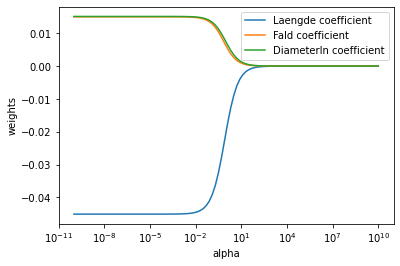

In [31]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, Laengde_coe, label="Laengde coefficient")
ax.plot(alphas, Fald_coe, label="Fald coefficient")
ax.plot(alphas, DiameterIn_coe, label="DiameterIn coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [32]:
for alpha in [alphas[0], alphas[50], alphas[-1]]:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(X_train, y_train), 
                                                              ridge.score(X_test,y_test)))
    print("")
    

alhpa = 1e-10
R^2 on train data is 0.03076931108625347 and on test data is 0.01802539106823775

alhpa = 1.2618568830660184
R^2 on train data is 0.02064379439369879 and on test data is 0.014819188039949527

alhpa = 10000000000.0
R^2 on train data is 5.815126158381645e-12 and on test data is -0.0007112796402692911



In [33]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.12328467394420634

In [34]:
print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(X_train, y_train), 
                                                              ridgecv.score(X_test,y_test)))

R^2 on train data is 0.030349643940824955 and on test data is 0.019032780336977084


In [35]:
ridgecv.coef_

array([-0.04190643,  0.00120837,  0.01409293])

Lasso


In [36]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

Laengde_coe = [coef[0] for coef in coefs]
Fald_coe = [coef[1] for coef in coefs]
DiameterIn_coe = [coef[2] for coef in coefs]

Text(0, 0.5, 'weights')

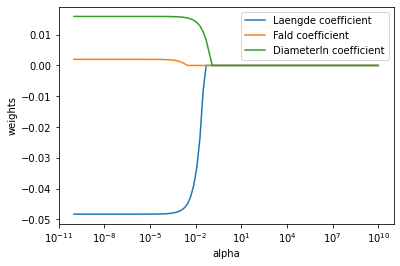

In [38]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, Laengde_coe, label="Laengde coefficient")
ax.plot(alphas, Fald_coe, label="Fald coefficient")
ax.plot(alphas, DiameterIn_coe, label="DiameterIn coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [39]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.008604826144520891, max_iter=10000, normalize=True)

In [40]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is 0.03036403817034461 and on test data is 0.01804913876389469


In [41]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Laengde      -0.037473
Fald          0.000000
DiameterIn    0.014505
dtype: float64

both show that it is not affected by the length of the pipes